In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv("diamond.csv")

In [42]:
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [44]:
data.groupby(["Cut"]).count()

,Carat Weight,Color,Clarity,Polish,Symmetry,Report,Price
Cut,,,,,,,
Fair,129,129,129,129,129,129,129
Good,708,708,708,708,708,708,708
Ideal,2482,2482,2482,2482,2482,2482,2482
Signature-Ideal,253,253,253,253,253,253,253
Very Good,2428,2428,2428,2428,2428,2428,2428


In [45]:
data.groupby(["Color"]).count()

,Carat Weight,Cut,Clarity,Polish,Symmetry,Report,Price
Color,,,,,,,
D,661,661,661,661,661,661,661
E,778,778,778,778,778,778,778
F,1013,1013,1013,1013,1013,1013,1013
G,1501,1501,1501,1501,1501,1501,1501
H,1079,1079,1079,1079,1079,1079,1079
I,968,968,968,968,968,968,968


In [46]:
data.groupby(["Clarity"]).count()

,Carat Weight,Cut,Color,Polish,Symmetry,Report,Price
Clarity,,,,,,,
FL,4,4,4,4,4,4,4
IF,219,219,219,219,219,219,219
SI1,2059,2059,2059,2059,2059,2059,2059
VS1,1192,1192,1192,1192,1192,1192,1192
VS2,1575,1575,1575,1575,1575,1575,1575
VVS1,285,285,285,285,285,285,285
VVS2,666,666,666,666,666,666,666


In [47]:
data.groupby(["Polish"]).count()

,Carat Weight,Cut,Color,Clarity,Symmetry,Report,Price
Polish,,,,,,,
EX,2425,2425,2425,2425,2425,2425,2425
G,571,571,571,571,571,571,571
ID,595,595,595,595,595,595,595
VG,2409,2409,2409,2409,2409,2409,2409


In [48]:
data.groupby(["Symmetry"]).count()

,Carat Weight,Cut,Color,Clarity,Polish,Report,Price
Symmetry,,,,,,,
EX,2059,2059,2059,2059,2059,2059,2059
G,916,916,916,916,916,916,916
ID,608,608,608,608,608,608,608
VG,2417,2417,2417,2417,2417,2417,2417


In [49]:
data.groupby(["Report"]).count()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Price
Report,,,,,,,
AGSL,734,734,734,734,734,734,734
GIA,5266,5266,5266,5266,5266,5266,5266


In [50]:
label = preprocessing.LabelEncoder() 
  
data['Cut']= label.fit_transform(data['Cut']) 
data['Color']= label.fit_transform(data['Color'])
data['Clarity']= label.fit_transform(data['Clarity']) 
data['Polish']= label.fit_transform(data['Polish']) 
data['Symmetry']= label.fit_transform(data['Symmetry'])
data['Report']= label.fit_transform(data['Report']) 

#one-hot encoding işleminde birkaç isim çatışması oluyor olmayan sutunlara yapıldığı zaman eğitim yavaşlıyor ve başarı düşüyor

In [51]:
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,2,4,2,3,0,1,5169
1,0.83,2,4,3,2,2,0,3470
2,0.85,2,4,2,0,0,1,3183
3,0.91,2,1,2,3,3,1,4370
4,0.83,2,3,2,0,0,1,3171


<function matplotlib.pyplot.xticks(*args, **kwargs)>

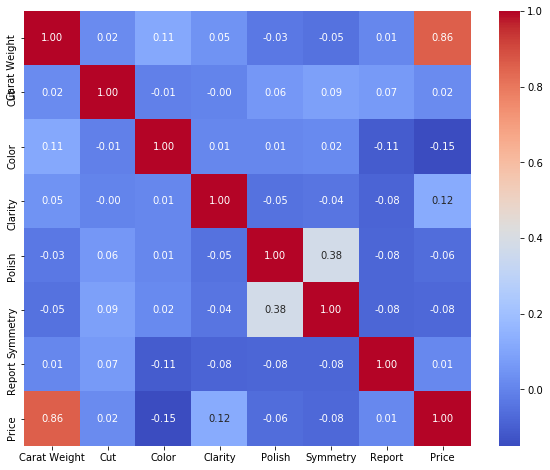

In [52]:
fig, ax = plt.subplots(figsize=(10,8))

correlation = data.corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks

In [53]:
y=data.Price

In [54]:
x=data.drop(["Price"] , axis=1)

In [55]:
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6
0,-0.493045,-0.586087,0.804418,-0.929801,1.100926,-1.186246,0.373343
1,-1.060681,-0.586087,0.804418,-0.199017,0.367953,0.330854,-2.678505
2,-1.018634,-0.586087,0.804418,-0.929801,-1.097995,-1.186246,0.373343
3,-0.892493,-0.586087,-1.116708,-0.929801,1.100926,1.089405,0.373343
4,-1.060681,-0.586087,0.164043,-0.929801,-1.097995,-1.186246,0.373343


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4800, 7)
x test:  (1200, 7)
y train:  (4800,)
y test:  (1200,)


In [57]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

In [58]:
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(x_poly,y,test_size=0.2,random_state=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4800, 7)
x test:  (1200, 7)
y train:  (4800,)
y test:  (1200,)


In [59]:
regressor=LinearRegression()

In [60]:
regressor.fit(x_train_poly,y_train_poly)
y_poly_pred = regressor.predict(x_test_poly)

In [61]:
print("train score" , regressor.score(x_train_poly,y_train_poly))
print("test score" , regressor.score(x_test_poly,y_test_poly))

train score 0.9521890250786714
test score 0.9350909496969784


In [62]:
R_2=r2_score(y_test_poly,y_poly_pred)
cross_val=cross_val_score(regressor,x_train_poly,y_train_poly,cv=5)
    

print("r_2 score :",R_2,"\n")
print("CV scores:",cross_val,"\n")
print("CV scores mean:",cross_val.mean())

r_2 score : 0.9350909496969784 

CV scores: [0.92979316 0.93322107 0.93492072 0.93920382 0.9280097 ] 

CV scores mean: 0.9330296929656019


In [63]:
def model(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_pred_df=pd.DataFrame(y_pred)
    y_pred_df.head()
    print("train score" , model.score(x_train,y_train))
    print("test score" , model.score(x_test,y_test))
    R_2=r2_score(y_test,y_pred)
    cross_val=cross_val_score(model,x_train,y_train,cv=5)
    
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [64]:
ridge = Ridge(alpha=10)

In [65]:
model(ridge)

train score 0.8096972917208352
test score 0.7991315587266338
r_2 score : 0.7991315587266338 

CV scores: [0.79702736 0.81664911 0.78218809 0.79955596 0.85788599] 

CV scores mean: 0.8106613020221914
Mean Absolute Error: 2700.714877167651
Mean Squared Error: 21207433.85315998
Root Mean Squared Error: 4605.152967400755


In [66]:
lasso=Lasso(alpha=10)

In [67]:
model(lasso)

train score 0.8096942989599293
test score 0.7992505204336294
r_2 score : 0.7992505204336294 

CV scores: [0.79696419 0.81671906 0.78228689 0.79948883 0.85780296] 

CV scores mean: 0.8106523848514346
Mean Absolute Error: 2699.4202088357383
Mean Squared Error: 21194874.027852546
Root Mean Squared Error: 4603.789094632002
